## ARTIFICIAL INTELLIGENCE LABORATORY

**WEEK 1 Representational Learning using Autoencoders**

**1. Use the Fashion MNIST data set and train a basic autoencoder to reconstruct images**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("FASHION MNIST Dataset Shape:")
print("X Train: " + str(x_train.shape))
print("Y Train: " + str(y_train.shape))
print("X Test: " + str(x_test.shape))
print("Y Test: " + str(y_test.shape))

FASHION MNIST Dataset Shape:
X Train: (60000, 28, 28)
Y Train: (60000,)
X Test: (10000, 28, 28)
Y Test: (10000,)


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

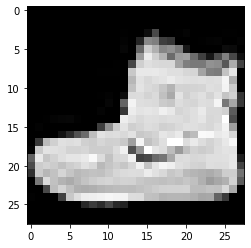

In [6]:
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [7]:
latent_size = 64

In [8]:
# Encoder - Autoencoder:

encoder = Sequential()
encoder.add(Conv2D(96, 11, 4, padding = "same", name = "ConvLayer1"))                                                      # padding = "valid"
encoder.add(BatchNormalization(momentum=0.93, epsilon=0.01))
encoder.add(MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer1"))
encoder.add(Conv2D(256, 5, 1, activation=LeakyReLU(0.25), padding = "same", name = "ConvLayer2"))
encoder.add(MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer2"))
encoder.add(BatchNormalization(momentum=0.93, epsilon=0.01))
encoder.add(Conv2D(384, 3, 1, activation=LeakyReLU(0.25), padding = "same", name = "ConvLayer3"))
encoder.add(Conv2D(384, 3, 1, activation=LeakyReLU(0.25), padding = "same", name = "ConvLayer4"))
encoder.add(Conv2D(256, 3, 1, activation=LeakyReLU(0.25), padding = "same", name = "ConvLayer5"))
# encoder.add(MaxPool2D(pool_size = 3, strides = 2, name = "MaxPoolLayer3"))
encoder.add(Flatten())
encoder.add(BatchNormalization(momentum=0.93, epsilon=0.01))
encoder.add(Dense(4096, activation=LeakyReLU(0.25), name = "HiddenLayer1"))
encoder.add(Dropout(0.8))
encoder.add(Dense(4096, activation=LeakyReLU(0.25), name = "HiddenLayer2"))
encoder.add(Dropout(0.6))
encoder.add(Dense(64, activation=LeakyReLU(0.25), name = "LatentSpace"))

In [9]:
# Decoder - Autoencoder:

decoder = Sequential()
decoder.add(Dense(64, activation="sigmoid", name = "LatentSpace"))
decoder.add(Dropout(0.6))
decoder.add(Dense(4096, activation="sigmoid", name = "HiddenLayer1"))
decoder.add(Dropout(0.8))
decoder.add(Dense(4096, activation="sigmoid", name = "HiddenLayer2"))
decoder.add(BatchNormalization(momentum=0.93, epsilon=0.01))
decoder.add(Dense(784, activation="sigmoid", name = "OutputLayer"))
decoder.add(Reshape((28, 28)))

In [10]:
ae_input = Input(shape = (28, 28, 1))

In [11]:
latent_vector = encoder(ae_input)
ae_output = decoder(latent_vector)

In [12]:
model = Model(ae_input, ae_output)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss = "mean_squared_error")

In [14]:
model.fit(x_train, x_train, epochs = 20, batch_size = 128)

Epoch 1/20
469/469 [==============================] - 24s 27ms/step - loss: 0.0653
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0528
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0532
Epoch 4/20
469/469 [==============================] - 14s 30ms/step - loss: 0.0526
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0518
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0534
Epoch 7/20
469/469 [==============================] - 13s 29ms/step - loss: 0.0527
Epoch 8/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0504
Epoch 9/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0527
Epoch 10/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0517
Epoch 11/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0505
Epoch 12/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0512
E

In [15]:
reconstructed_images = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


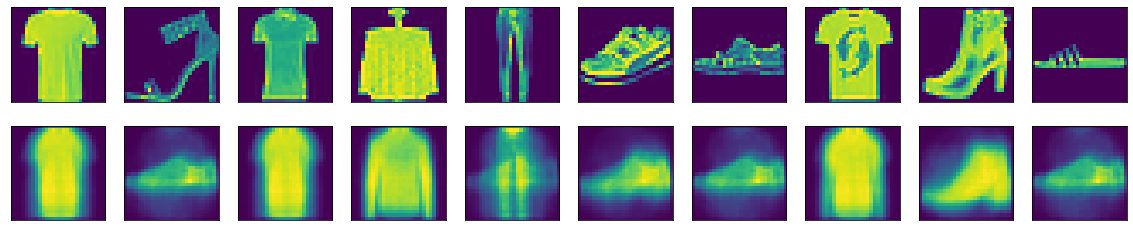

In [16]:
from random import randint


plt.figure(figsize = (20 ,4))

for i in range(1, 11):

  rand_num = randint(0, 10001)

  ax = plt.subplot(2, 10, i)
  plt.imshow(x_test[rand_num])
  # plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, 10, i+10)
  plt.imshow(reconstructed_images[rand_num])
  # plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()

**2. Train an autoencoder to detect anomalies using the ECG5000 dataset**

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [20]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [21]:
labels=raw_data[:,-1]
data=raw_data[:,0:-1]
train_data,test_data,train_labels,test_labels=train_test_split(data,labels,test_size=0.2,random_state=21)

In [23]:
min_val=tf.reduce_min(train_data)
max_val=tf.reduce_max(train_data)
train_data=(train_data-min_val)/(max_val-min_val)
test_data=(test_data-min_val)/(max_val-min_val)
train_data=tf.cast(train_data,tf.float32)
test_data=tf.cast(test_data,tf.float32)
test_data.dtype

tf.float32

In [24]:
trian_labels=train_labels.astype(bool)
test_labels=test_labels.astype(bool)

normal_train_data = train_data[train_labels==True]
normal_test_data = test_data[test_labels==True]

anomalous_train_data = train_data[train_labels==False]
anomalous_test_data = test_data[test_labels==False]
normal_test_data

<tf.Tensor: shape=(560, 140), dtype=float32, numpy=
array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
        0.3713729 ],
       [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
        0.49527124],
       [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
        0.4754273 ],
       ...,
       [0.48304972, 0.36122933, 0.27729514, ..., 0.32799056, 0.3158066 ,
        0.26930442],
       [0.4090865 , 0.27907097, 0.22604261, ..., 0.39099607, 0.45987615,
        0.42140076],
       [0.42648116, 0.17669384, 0.14546008, ..., 0.4733389 , 0.55036914,
        0.37805188]], dtype=float32)>

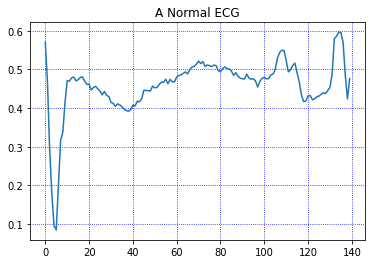

In [25]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

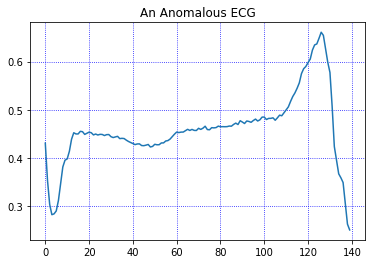

In [26]:
plt.grid(linestyle=":",color="b")
plt.plot(np.arange(140),anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [27]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector,self).__init__()
        self.encoder=tf.keras.Sequential([layers.Dense(32,activation="relu"),
                                          layers.Dense(16,activation="relu"),
                                          layers.Dense(8,activation="relu")])
        
        self.decoder=tf.keras.Sequential([
                                          layers.Dense(16, activation="relu"),
                                          layers.Dense(32, activation="relu"),
                                          layers.Dense(140, activation="sigmoid")])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(x)
        return decoded

autoencoder=AnomalyDetector()

autoencoder.compile(optimizer='adam',loss='mae')

In [28]:
history=autoencoder.fit(normal_train_data,normal_train_data,epochs=20,batch_size=512, validation_data=(test_data,test_data),shuffle=True)

Epoch 1/20


5/5 [==============================] - 1s 43ms/step - loss: 0.0581 - val_loss: 0.0532
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0557 - val_loss: 0.0515
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0528 - val_loss: 0.0499
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0493 - val_loss: 0.0486
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0458 - val_loss: 0.0470
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0421 - val_loss: 0.0448
Epoch 7/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0386 - val_loss: 0.0428
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0353 - val_loss: 0.0413
Epoch 9/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0326 - val_loss: 0.0402
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0305 - val_loss: 0.0391
Epoch 11/20
5/5 [==========================

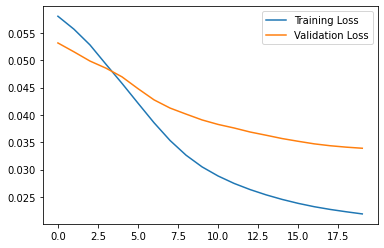

In [29]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

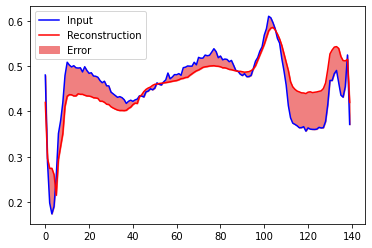

array([[0.3321983 , 0.03842928, 0.        , ..., 0.        , 0.        ,
        0.1464475 ],
       [0.37149942, 0.06173778, 0.        , ..., 0.        , 0.        ,
        0.17739712],
       [0.38113335, 0.07062793, 0.        , ..., 0.        , 0.        ,
        0.16044922],
       ...,
       [0.3808723 , 0.05446419, 0.        , ..., 0.        , 0.        ,
        0.12572896],
       [0.37355548, 0.06125681, 0.        , ..., 0.        , 0.        ,
        0.16071354],
       [0.37024516, 0.05876824, 0.        , ..., 0.        , 0.        ,
        0.1772518 ]], dtype=float32)

In [30]:
# Plot Error after Reconstruction of Normal:

encoded_imgs=autoencoder.encoder(normal_test_data).numpy()
decoded_imgs=autoencoder.decoder(normal_test_data).numpy()
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],normal_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()
encoded_imgs

In [31]:
encoded_imgs=autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs=autoencoder.decoder(anomalous_test_data).numpy()

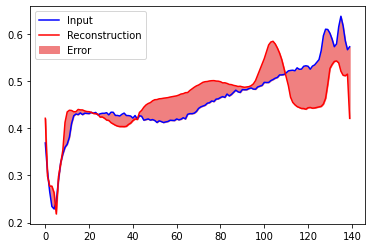

In [32]:
# Plot Error after Reconstruction for Anomalous:

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140),decoded_imgs[0],anomalous_test_data[0],color='lightcoral')
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()

In [33]:
reconstructions=autoencoder.predict(normal_train_data)
reconstructions

74/74 [==============================] - 0s 3ms/step


array([[0.41779578, 0.29134563, 0.2689694 , ..., 0.5119273 , 0.5156709 ,
        0.41799766],
       [0.42090324, 0.29849583, 0.27679995, ..., 0.51130515, 0.5146759 ,
        0.42085686],
       [0.41895714, 0.29400778, 0.27188134, ..., 0.5116946 , 0.5152988 ,
        0.41906628],
       ...,
       [0.4203289 , 0.2971679 , 0.2753434 , ..., 0.51142   , 0.5148597 ,
        0.42032847],
       [0.41816586, 0.2921927 , 0.2698955 , ..., 0.5118531 , 0.5155523 ,
        0.4183382 ],
       [0.4210873 , 0.298922  , 0.27726758, ..., 0.5112683 , 0.5146171 ,
        0.42102617]], dtype=float32)

In [34]:
train_loss=tf.keras.losses.mae(reconstructions,normal_train_data).numpy()
train_loss

array([0.02807313, 0.01278305, 0.02077822, ..., 0.0139117 , 0.0235725 ,
       0.01803436], dtype=float32)

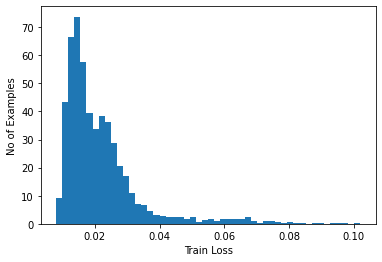

In [35]:
plt.hist(train_loss,bins=50,density=True)
plt.xlabel("Train Loss")
plt.ylabel("No of Examples")
plt.show()

In [36]:
threshold=np.mean(train_loss)+np.std(train_loss)
print("Threshold",threshold)

Threshold 0.03385853


In [37]:
reconstructions=autoencoder.predict(anomalous_test_data)
reconstructions

14/14 [==============================] - 0s 2ms/step


array([[0.42098936, 0.29869524, 0.27701873, ..., 0.5112879 , 0.5146484 ,
        0.42093608],
       [0.42301026, 0.30326432, 0.2838518 , ..., 0.51104313, 0.5124347 ,
        0.4248719 ],
       [0.422249  , 0.3015695 , 0.28087217, ..., 0.51109755, 0.5136399 ,
        0.4228967 ],
       ...,
       [0.42275494, 0.30267504, 0.2831155 , ..., 0.5110866 , 0.51259047,
        0.4245385 ],
       [0.4228888 , 0.3029251 , 0.28426868, ..., 0.51113665, 0.51179075,
        0.4256652 ],
       [0.422647  , 0.3026142 , 0.281343  , ..., 0.5109522 , 0.51408225,
        0.4224744 ]], dtype=float32)

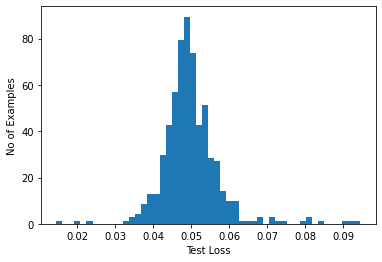

In [38]:
test_loss=tf.keras.losses.mae(reconstructions,anomalous_test_data).numpy()
plt.hist(test_loss,bins=50,density=True)
plt.xlabel("Test Loss")
plt.ylabel("No of Examples")
plt.show()

In [39]:
def predict(model,data,threshold):
    reconstructions=model(data)
    loss=tf.keras.losses.mae(reconstructions,data)
    return tf.math.less(loss,threshold)
def print_stats(prediction,labels):
    print("Accuracy={}".format(accuracy_score(labels,preds)))
    print("Precision={}".format(precision_score(labels,preds)))
    print("Recall={}".format(recall_score(labels,preds)))

In [40]:
preds=predict(autoencoder,test_data,threshold)
print_stats(preds,test_labels)

Accuracy=0.946
Precision=0.9922178988326849
Recall=0.9107142857142857
